<a href="https://colab.research.google.com/github/kibo-max/practice/blob/master/GROUP_4_DRAFT_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT TITLE: TWEET SENTIMENTS ABOUT APPLE PRODUCTS

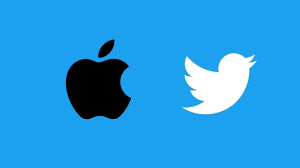

## INTRODUCTION
Apple's products are some of the most widely used across the world. In order for the company to continue to attract customers and investors for their products, its important for Apple to continously analyze customer sentiments that will inform its marketing strategies, product development, investor relations and provide stocks and financial insights.

## PROBLEM STATEMENT

Customer sentiments drive business growth and products uptake. Therefore there is need to undestand the public's emotional response to Apple's products, brand, and key events, that will help to inform various strategies deployed to enhance marketing through gauging customer perceptions of specific campaigns product launches or promotions; provide valuable feedback on exisitng products through customer complaints, desires and suggestions that will help to prioritize improvements or features by customers when conducting product development; assist to detect early shifts in public perception that might affect Apple's stock performance; and manage investor relations more effectively. This will enhance its brand strategy and customer satisfaction.

## OBJECTIVES

The main objective of the project is to analyze sentiment signals related to Apple's products in order to monitor brand reputation, detect early signs of potential public relations crises, and extracting valuable customer insights that will drive product and improvements on customer relations.

To achieve the said main objective, the project will focus on the following specific objectives to -

(i) Conduct explaratory data analysis of the dataset;

(ii) Preprocess the data through cleaning, tokenization, and vectorization

(iii) Apply machine learning models for sentiment classification

(iv) Assess model performance using important metrics

## DATA

The source of this dataset is: crowdflower and can be accessed through this link: https://data.world/crowdflower/apple-twitter-sentiment/workspace/file?filename=Apple-Twitter-Sentiment-DFE.csv.

The dataset comprises approximately 12 features and 3,886 observations of tweets related to Apple, with each record containing metadata such as tweet IDs, dates, query strings, and sentiment labels along with confidence scores. Our target variable is the tweet sentiment, labeled categorically (e.g., positive, negative, neutral), while the predictors include textual content from the tweets(text),

The key features of the data are on customer sentiments which are classified as either positive, negative, neutral(int) and tweets from various customer's which are in text format. The limitations of the data are the duplicated rows and class imbalances.

## 1. DATA UNDERSTANDING

Import relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import os
import joblib
import nltk
import string
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TABITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TABITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\TABITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\TABITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TABITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data loading and view afew rows

In [ ]:
data = pd.read_csv("Apple-Twitter-Sentiment-DFE.csv", encoding='latin-1')
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


Create a copy of the original data to ensure that changes made made to the DataFrama do not affect the data.

In [ ]:
df = data.copy()

Check frequency of each distinct value in the sentiment column

In [ ]:
data.sentiment.value_counts()

3               2162
1               1219
5                423
not_relevant      82
Name: sentiment, dtype: int64

Filter and exclude any data point with the 'not_relevant' sentiment as it will not be relevant to the analysis

In [ ]:
data = data[data['sentiment'] != 'not_relevant']


print(data['sentiment'].value_counts())

3    2162
1    1219
5     423
Name: sentiment, dtype: int64


Retrieve column names contained in the data for correcr reference going forward and to track

In [ ]:
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'sentiment', 'sentiment:confidence', 'date', 'id',
       'query', 'sentiment_gold', 'text'],
      dtype='object')

Get the dimensions of the data, specifically the number of rows and columns

In [ ]:
data.shape

(3804, 12)

Retrieve a summary of the DataFrame to understand its structure and the data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3804 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3804 non-null   int64  
 1   _golden               3804 non-null   bool   
 2   _unit_state           3804 non-null   object 
 3   _trusted_judgments    3804 non-null   int64  
 4   _last_judgment_at     3702 non-null   object 
 5   sentiment             3804 non-null   object 
 6   sentiment:confidence  3804 non-null   float64
 7   date                  3804 non-null   object 
 8   id                    3804 non-null   float64
 9   query                 3804 non-null   object 
 10  sentiment_gold        102 non-null    object 
 11  text                  3804 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 360.3+ KB


Retrieve an overview of the distribution and key statistics of the numeric features in the dataset. Amongst other things, this helps to understand identify potential outliers in the data. From the analysis below, the data does not appear to have any outliers due to the fact that the minimum and maximum values are very close to each other and the standard deviation suggests that the values are tightly clustered around the mean.

In [ ]:
data.describe()

,_unit_id,_trusted_judgments,sentiment:confidence,id
count,3.804000e+03,3804.000000,3804.000000,3.804000e+03
mean,6.234975e+08,3.680336,0.832588,5.410071e+17
std,1.172134e+03,2.011621,0.174946,7.938775e+14
min,6.234955e+08,3.000000,0.332700,5.400000e+17
25%,6.234965e+08,3.000000,0.675500,5.400000e+17
50%,6.234975e+08,3.000000,0.893800,5.410000e+17
75%,6.234984e+08,3.000000,1.000000,5.420000e+17
max,6.235173e+08,27.000000,1.000000,5.420000e+17


Inspect and print the details of each column in the DataFrame, showing the unique values and their counts

In [ ]:
for col in data.columns:
    print(f"\nColumn: {col}")

    # Use 'data' instead of 'df' to access the DataFrame
    unique_vals = data[col].unique()
    num_unique = data[col].nunique()

    # If there are too many unique values, summarize
    if num_unique > 10:
        print(f"  → {num_unique} unique values (showing first 10): {unique_vals[:10]}")
    else:
        print(data[col].value_counts().to_string())


Column: _unit_id
  → 3804 unique values (showing first 10): [623495513 623495514 623495515 623495516 623495517 623495518 623495519
 623495520 623495521 623495522]

Column: _golden
False    3702
True      102

Column: _unit_state
finalized    3701
golden        103

Column: _trusted_judgments
  → 19 unique values (showing first 10): [10 12 17  3 13  9 15 11  6 16]

Column: _last_judgment_at
  → 387 unique values (showing first 10): [nan '12/12/14 12:14' '12/12/14 0:52' '12/12/14 21:38' '12/12/14 15:50'
 '12/12/14 4:59' '12/12/14 20:59' '12/12/14 8:36' '12/12/14 14:08'
 '12/12/14 8:42']

Column: sentiment
3    2162
1    1219
5     423

Column: sentiment:confidence
  → 635 unique values (showing first 10): [0.6264 0.8129 1.     0.5848 0.6474 0.5975 0.8468 0.6736 0.7997 0.636 ]

Column: date
  → 3718 unique values (showing first 10): ['Mon Dec 01 19:30:03 +0000 2014' 'Mon Dec 01 19:43:51 +0000 2014'
 'Mon Dec 01 19:50:28 +0000 2014' 'Mon Dec 01 20:26:34 +0000 2014'
 'Mon Dec 01 20:29:33 +

## 2. DATA CLEANING AND EXPLORATION

Get an overview of missing data in each colum of the DataFrame in order to identify an appropriate data cleaning technique.

In [ ]:
data.isna().sum()

_unit_id                   0
_golden                    0
_unit_state                0
_trusted_judgments         0
_last_judgment_at        102
sentiment                  0
sentiment:confidence       0
date                       0
id                         0
query                      0
sentiment_gold          3702
text                       0
dtype: int64

Drop the columns that will not be used in the analysis

In [ ]:
data.drop(columns=['_unit_id', '_golden', '_unit_state', '_trusted_judgments','_last_judgment_at','sentiment:confidence', 'date', 'id','query', 'sentiment_gold'], inplace=True)

Confirm that the columns identified above were dropped

In [ ]:
data

,sentiment,text
0,3,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,3,My cat only chews @apple cords. Such an #Apple...
3,3,I agree with @jimcramer that the #IndividualIn...
4,3,Nobody expects the Spanish Inquisition #AAPL
...,...,...
3881,3,(Via FC) Apple Is Warming Up To Social Media -...
3882,3,RT @MMLXIV: there is no avocado emoji may I as...
3883,5,@marcbulandr I could not agree more. Between @...
3884,1,My iPhone 5's photos are no longer downloading...


Identify and extract duplicate rows in the DataFrame

In [ ]:
data[data.duplicated()]

,sentiment,text
32,3,RT @thehill: Justice Department cites 18th cen...
34,3,RT @thehill: Justice Department cites 18th cen...
38,3,RT @thehill: Justice Department cites 18th cen...
42,3,RT @thehill: Justice Department cites 18th cen...
45,3,RT @thehill: Justice Department cites 18th cen...
...,...,...
3846,3,RT @TeamCavuto: Protesters stage #DieIn protes...
3852,3,RT @TeamCavuto: Protesters stage #DieIn protes...
3855,1,RT @Ecofantasy: Thinking of upgrading to #Yose...
3878,5,RT @shannonmmiller: Love the @Apple is support...


Remove all duplicate rows from the DataFrame

In [ ]:

data=data.drop_duplicates()

## 3. DATA PRE-PROCESSING

Feature selection: Extract the values from the text column in rows 1 & 2, and assign them to variables for further use.

In [ ]:
first_string = data['text'].iloc[1]
second_string = data['text'].iloc[2]
print(first_string)
print(second_string)

RT @JPDesloges: Why AAPL Stock Had a Mini-Flash Crash Today $AAPL #aapl
http://t.co/hGFcjYa0E9
My cat only chews @apple cords. Such an #AppleSnob.


Conduct text cleaning by removing unwanted elements such as hashtags, single letters, symbols amongst others, split text into tokens and convert them to lowercase, remove common words, and reduce words to their base form

In [ ]:
def clean_text(text):
    # Create a list of English stopwords and add punctuation to it
    stopword_list = stopwords.words('english') + list(string.punctuation)+ list(string.punctuation) + ['rt', 'via', '...','’', '“', '”', '‘', '’']

    # Initialize the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Remove hyperlinks, usernames, words with one character, hashtags and repeated dots
    text = re.sub(r"https?:[^\s]+|@[\S]+|\b\w\b|\#\w+|\.\.+", "", text)

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Convert tokens to lowercase, remove stopwords, and lemmatize each word
    cleaned_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stopword_list]
    return cleaned_tokens

    # Lowercase the text and remove stopwords
    text = [word.lower() for word in text if word.lower() not in stopword_list]
    return text

print(clean_text(first_string))


['aapl', 'stock', 'mini-flash', 'crash', 'today', 'aapl']


In [ ]:
data["text_clean"]= data["text"].apply(clean_text)

Store cleaned text in a new column "text_clean"

In [ ]:
data["text_clean"]

0                     [10, best, steve, job, email, ever]
1           [aapl, stock, mini-flash, crash, today, aapl]
2                                       [cat, chew, cord]
3       [agree, trade, extended, today, pullback, good...
4                 [nobody, expects, spanish, inquisition]
                              ...                        
3880    [hey, normal, laptop, charger, soldering, skin...
3881    [fc, apple, warming, social, medium, apple, hi...
3882                           [avocado, emoji, may, ask]
3883                 [could, agree, great, thing, happen]
3884    [iphone, photo, longer, downloading, automatic...
Name: text_clean, Length: 3162, dtype: object

In [ ]:
def tf_idf(tokenized_text):
  tf_idf = []

  # Use a different variable name for document frequency
  doc_freq = {}

  # Calculate document frequency
  for document in tokenized_text:
    for word in set(document):
      if word not in doc_freq:
        doc_freq[word] = 0
      doc_freq[word] += 1

  # Total number of documents
  N = len(tokenized_text)

# Calculate TD-IDF for each document
  for document in tokenized_text:
    tf_idf_dict = {}
    tf = {}

# Calculate the term requency
    for word in document:
      if word not in tf:
        tf[word] = 0
      tf[word] += 1

# Calculate TD-IDF
    for word in set(document):
      tf_idf_dict[word] = (tf[word] / len(document)) * np.log(N / (doc_freq[word] + 1))

    tf_idf.append(tf_idf_dict)

  return tf_idf

tokenized_text = data['text_clean'].tolist()
# Call the tf_idf function
tf_idf_result = tf_idf(tokenized_text)

tf_idf_result

[{'ever': 0.8066806988168694,
  '10': 0.843871290702571,
  'best': 0.701468736009893,
  'job': 0.6128222305159226,
  'steve': 0.632713356788017,
  'email': 0.7877925845990356},
 {'mini-flash': 1.1121109427749212,
  'aapl': 0.7625062982131339,
  'today': 0.7050531035467205,
  'crash': 0.8810618825882727,
  'stock': 0.6235786507055178},
 {'cord': 1.7419155579044006,
  'cat': 2.149840701778439,
  'chew': 2.4552709457364905},
 {'today': 0.6043312316114746,
  'extended': 1.0522589767442103,
  'agree': 0.7848586657582686,
  'trade': 0.8223392749679103,
  'see': 0.651778922328991,
  'pullback': 0.9532379509499324,
  'good': 0.6043312316114746},
 {'spanish': 1.841453209302368,
  'nobody': 1.841453209302368,
  'inquisition': 1.740086932275327,
  'expects': 1.841453209302368},
 {'apple': 0.2522683929058329,
  'gain': 1.0749203508892196,
  'rocket': 1.2276354728682453,
  'stock': 0.6235786507055178,
  'buy': 0.697959834476921,
  'december': 0.7459068465522178},
 {'right': 1.600287826582645,
  'da

In [ ]:
import numpy as np  # Required for np.log

def tf_idf(tokenized_text):
    tf_idf = []
    doc_freq = {}

    # First pass: Calculate document frequency
    for document in tokenized_text:
        for word in set(document):
            doc_freq[word] = doc_freq.get(word, 0) + 1

    # Second pass: Calculate TF-IDF
    N = len(tokenized_text)
    for document in tokenized_text:
        tf = {}
        for word in document:
            tf[word] = tf.get(word, 0) + 1

        tf_idf_dict = {}
        for word in document:
            # Handle division by zero and unseen words
            df = doc_freq.get(word, 0) + 1
            tf_idf_value = (tf[word]/len(document)) * np.log(N/df)
            tf_idf_dict[word] = tf_idf_value

        tf_idf.append(tf_idf_dict)

    return tf_idf

## 4. DATA ANALYSIS

We are going to interprete the data to extract useful insights, identify patterns and support decision-making.

## Feature Selection

In [ ]:
data['sentiment'].unique()

array(['3', '5', '1'], dtype=object)

### Create a bar graph showing the distribution of sentiments (positive, negative, neutral) in the cleaned dataset.

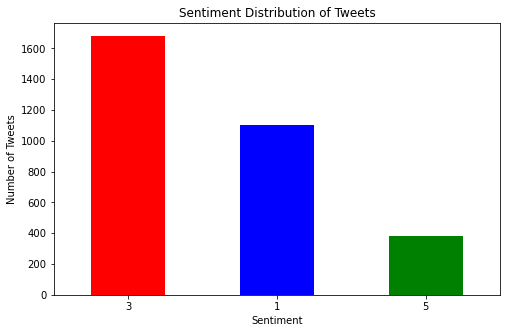

In [ ]:
# Plot sentiment distribution
plt.figure(figsize=(8,5))
data['sentiment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Sentiment Distribution of Tweets")
plt.xticks(rotation=0)
plt.show()

### Produce a list of every word from the text data that has been cleaned. Calculate their frequencies and create a plot to show the 30 most frequent words.

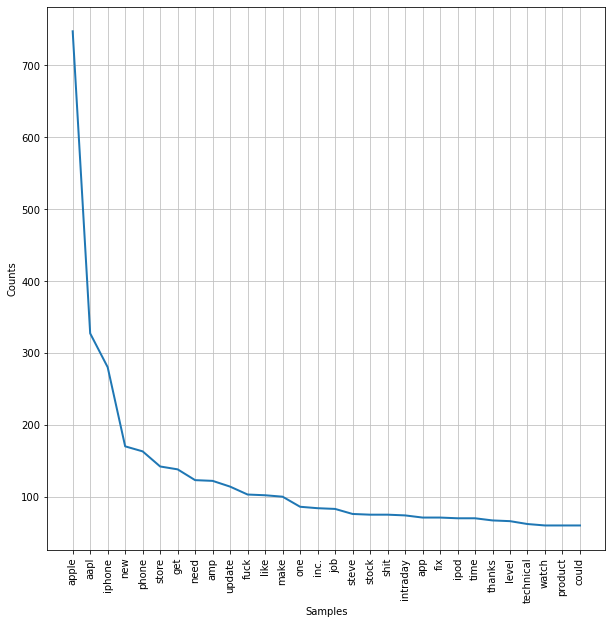

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
# Flatten the list of lists into a single list of words
all_words = [word for sublist in data['text_clean'] for word in sublist]

# Create a FreqDist object from the flattened list
fdist = FreqDist(all_words)

# Plot the most frequent words
plt.figure(figsize=(10, 10))
fdist.plot(30)

### Determine the sentiment of tweets, filter for positive tweets, identify the most frequent words in those tweets and present the findings in a bar chart.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\TABITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


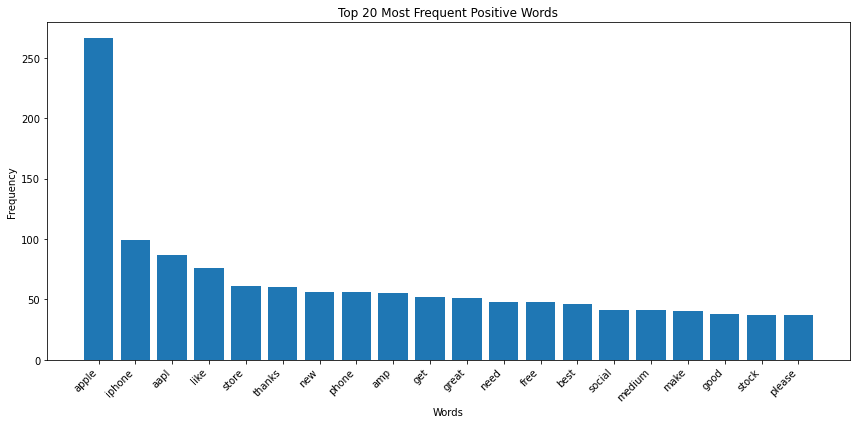

In [ ]:
import nltk
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming 'data' DataFrame and 'text_clean' column are already available

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get compound sentiment score for a list of tokens
def get_compound_sentiment(tokens):
    text = " ".join(tokens)
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the 'text_clean' column
data['compound_sentiment'] = data['text_clean'].apply(get_compound_sentiment)

# Filter out tweets with positive sentiment
positive_tweets = data[data['compound_sentiment'] > 0]

# Flatten the list of lists into a single list of words from positive tweets
all_positive_words = [word for sublist in positive_tweets['text_clean'] for word in sublist]

# Create a FreqDist object from the flattened list
fdist_positive = FreqDist(all_positive_words)

# Get the top 20 most frequent positive words
top_20_positive_words = fdist_positive.most_common(20)

# Extract words and counts for plotting
words, counts = zip(*top_20_positive_words)

# Plot the top 20 most frequent positive words
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Positive Words")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust plot layout to prevent labels from overlapping
plt.show()

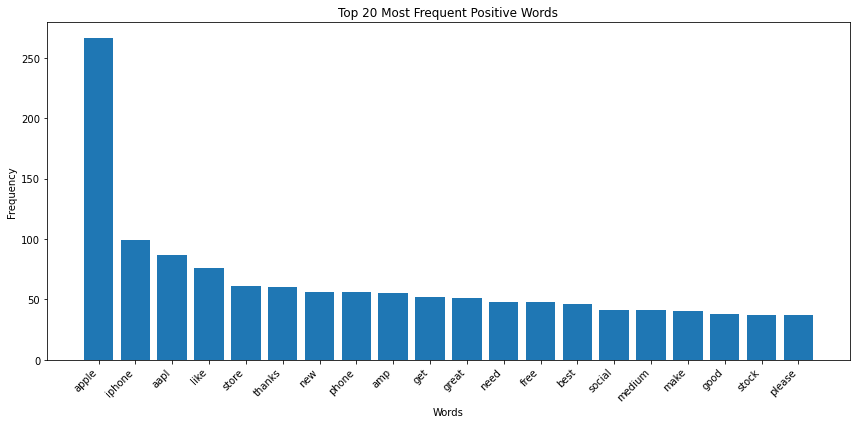

In [ ]:

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get compound sentiment score for a list of tokens
def get_compound_sentiment(tokens):
    text = " ".join(tokens)
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the 'text_clean' column
data['compound_sentiment'] = data['text_clean'].apply(get_compound_sentiment)

# Filter out tweets with positive sentiment
positive_tweets = data[data['compound_sentiment'] > 0]

# Create a FreqDist object from the flattened list
fdist_positive = FreqDist(all_positive_words)

# Get the top 20 most frequent positive words
top_20_positive_words = fdist_positive.most_common(20)

# Extract words and counts for plotting
words, counts = zip(*top_20_positive_words)

# Plot the top 20 most frequent positive words
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Positive Words")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust plot layout to prevent labels from overlapping
plt.show()

### Determine the sentiment of tweets, filter for negative tweets, identify the most frequent words in those tweets and present the findings in a bar chart.

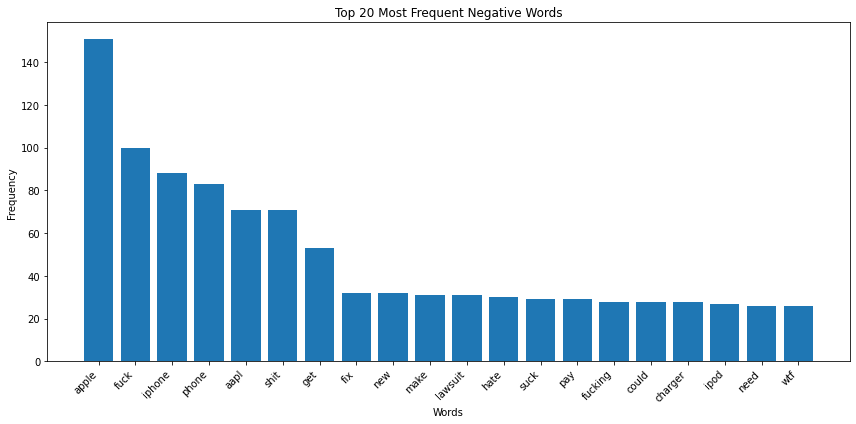

In [ ]:
# Assuming 'data' DataFrame and 'text_clean' column are already available

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get compound sentiment score for a list of tokens
def get_compound_sentiment(tokens):
    text = " ".join(tokens)
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the 'text_clean' column
data['compound_sentiment'] = data['text_clean'].apply(get_compound_sentiment)

# Filter out tweets with negative sentiment
negative_tweets = data[data['compound_sentiment'] < 0]  # Changed to < 0 for negative sentiment

# Flatten the list of lists into a single list of words from negative tweets
all_negative_words = [word for sublist in negative_tweets['text_clean'] for word in sublist]

# Create a FreqDist object from the flattened list
fdist_negative = FreqDist(all_negative_words)

# Get the top 20 most frequent negative words
top_20_negative_words = fdist_negative.most_common(20)

# Extract words and counts for plotting
words, counts = zip(*top_20_negative_words)

# Plot the top 20 most frequent negative words
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Negative Words")  # Changed title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust plot layout to prevent labels from overlapping
plt.show()

### Determine the sentiment of tweets, filter for neutral tweets, identify the most frequent words in those tweets and present the findings in a bar chart.

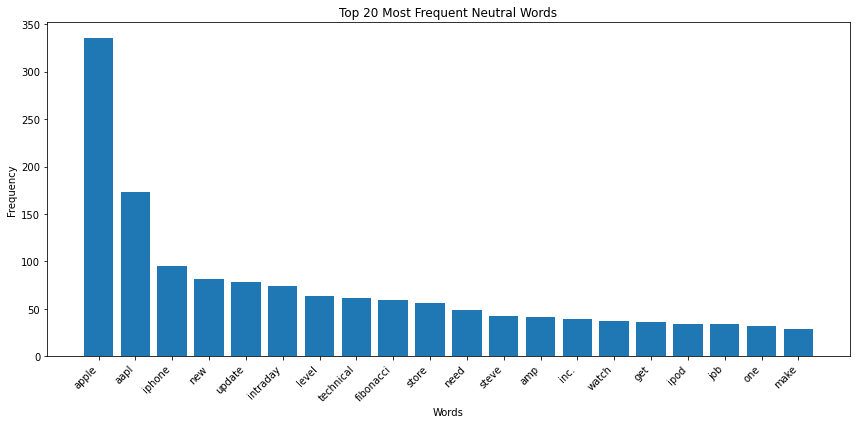

In [ ]:
# Assuming 'data' DataFrame and 'text_clean' column are already available

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get compound sentiment score for a list of tokens
def get_compound_sentiment(tokens):
    text = " ".join(tokens)
    return analyzer.polarity_scores(text)['compound']

# Apply the function to the 'text_clean' column
data['compound_sentiment'] = data['text_clean'].apply(get_compound_sentiment)

# Filter out tweets with neutral sentiment (compound sentiment score close to 0)
neutral_tweets = data[(data['compound_sentiment'] >= -0.05) & (data['compound_sentiment'] <= 0.05)]

# Flatten the list of lists into a single list of words from neutral tweets
all_neutral_words = [word for sublist in neutral_tweets['text_clean'] for word in sublist]

# Create a FreqDist object from the flattened list
fdist_neutral = FreqDist(all_neutral_words)

# Get the top 20 most frequent neutral words
top_20_neutral_words = fdist_neutral.most_common(20)

# Extract words and counts for plotting
words, counts = zip(*top_20_neutral_words)

# Plot the top 20 most frequent neutral words
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Neutral Words")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust plot layout to prevent labels from overlapping
plt.show()

### Visualize the daily average sentiment and the 7-day rolling average showing how sentiments towards Apple changed over time.

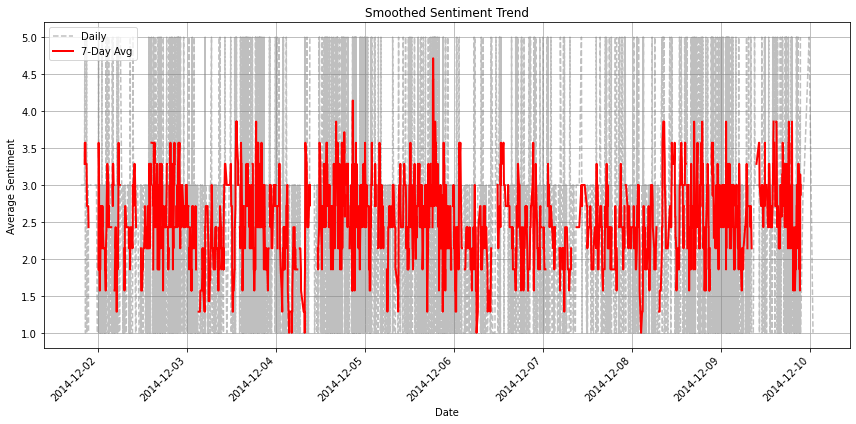

In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Convert target column to numeric
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

# Now perform groupby and mean
result = df.groupby('date')['sentiment'].mean()

plt.figure(figsize=(12, 6))
window_size = 7  # 7-day rolling mean (adjust based on your data frequency)
rolling_mean = result.rolling(window=window_size).mean()
plt.plot(result.index, result.values, linestyle='--', color='gray', alpha=0.5, label='Daily')
plt.plot(rolling_mean.index, rolling_mean.values, color='red', linewidth=2, label=f'{window_size}-Day Avg')
plt.xlabel("Date")
plt.ylabel("Average Sentiment")
plt.title("Smoothed Sentiment Trend")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Visualize how the average sentiment of tweets about Apple changes throughout the hours of the day over time.

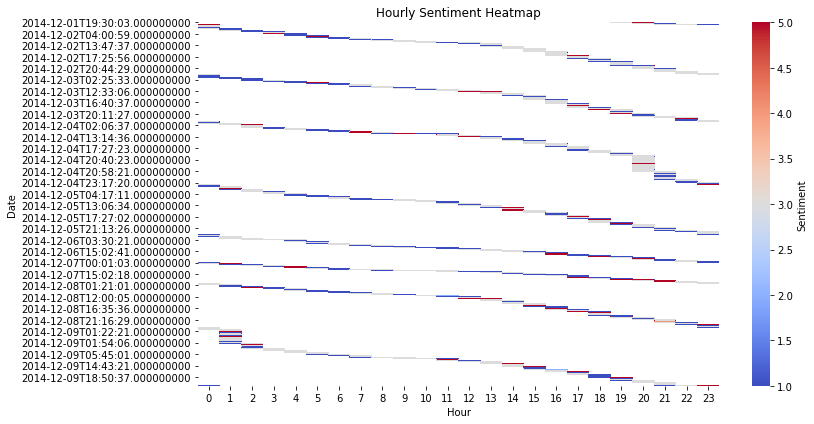

In [ ]:
df['hour'] = df['date'].dt.hour
# Replace 'value' with 'sentiment' since you want to aggregate sentiment values
pivot_table = df.pivot_table(index='date', columns='hour', values='sentiment', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm', cbar_kws={'label': 'Sentiment'})
plt.xlabel("Hour")
plt.ylabel("Date")
plt.title("Hourly Sentiment Heatmap")
plt.tight_layout()
plt.show()

### Analyze the daily trends in negative tweets related to Apple and highlight days with unusually high negative sentiment.

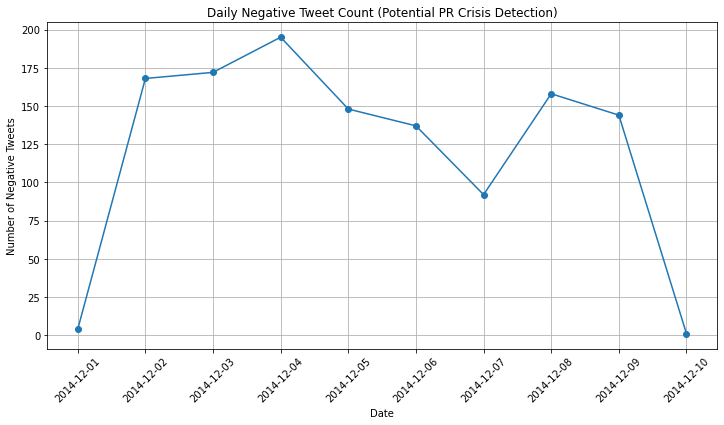

Days with significant spikes in negative tweets:
Series([], dtype: int64)


In [ ]:
# Count negative tweets per day
negative_df = df[df['sentiment'] == 1]
daily_negatives = negative_df.groupby(negative_df['date'].dt.date).size()

# Plot the count of negative tweets per day
plt.figure(figsize=(12,6))
daily_negatives.plot(kind='line', marker='o')
plt.xlabel("Date")
plt.ylabel("Number of Negative Tweets")
plt.title("Daily Negative Tweet Count (Potential PR Crisis Detection)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Optionally, you can flag days with counts significantly above the mean
mean_count = daily_negatives.mean()
std_count = daily_negatives.std()
threshold = mean_count + 2 * std_count
spike_days = daily_negatives[daily_negatives > threshold]

print("Days with significant spikes in negative tweets:")
print(spike_days)

### Calculate and visualize the daily trend of positive tweets related to Apple and highlight days with unusually high positive sentiments.

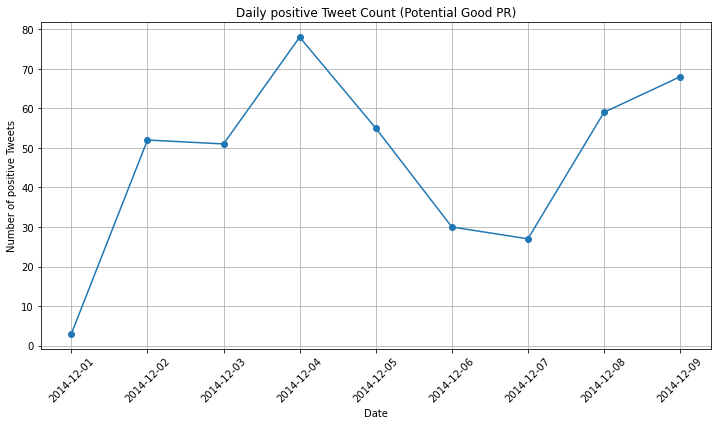

Days with significant spikes in positive tweets:
Series([], dtype: int64)


In [ ]:
# Count positive tweets per day
positive_df = df[df['sentiment'] == 5]
daily_positive = positive_df.groupby(positive_df['date'].dt.date).size()

# Plot the count of positive tweets per day
plt.figure(figsize=(12,6))
daily_positive.plot(kind='line', marker='o')
plt.xlabel("Date")
plt.ylabel("Number of positive Tweets")
plt.title("Daily positive Tweet Count (Potential Good PR)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Optionally, you can flag days with counts significantly above the mean
mean_count = daily_positive.mean()
std_count = daily_positive.std()
threshold = mean_count + 2 * std_count
spike_days = daily_positive[daily_positive > threshold]

print("Days with significant spikes in positive tweets:")
print(spike_days)

# 5. MODELLING AND EVALUATION

###  Build and evaluate a baseline model TfidfVectorizer and Logistic Regression
- Load the cleaned and processed tweet data.
- Identify 'X' and 'y'
- Split the data into train and test sets

### Feature Selection

removal of Neutral setiments to make it a Binary Classification for easier interpretability

In [ ]:
data = data[data['sentiment'] != '3']
data['sentiment'].unique()

array(['5', '1'], dtype=object)

Loading Data

In [ ]:
data = pd.read_csv("text_clean.csv")

splitting Data into target and Predictive Variables
Splitting Data into testing and training set

In [ ]:
X = data['text_clean']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

### Using TF-IDF, convert the text data into numerical representations.

In [ ]:
# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Convert token lists to strings
X_train_text = X_train.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
X_test_text = X_test.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Vectorize the data
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

In [ ]:
# Now you can train your model using the vectorized data
logreg = LogisticRegression()
base_model = logreg.fit(X_train_vec, y_train) # Use X_train_vec instead of X_train

In [ ]:
y_pred = base_model.predict(X_test_vec)

log_f1 = f1_score(y_test, y_pred, average='weighted')
log_acc = accuracy_score(y_test, y_pred)
log_report = classification_report(y_test, y_pred)
log_conf_matrix = confusion_matrix(y_test, y_pred)


log_acc = accuracy_score(y_test, y_pred)
log_report = classification_report(y_test, y_pred)

print(f"f1 score:\n",log_f1) #  average='weighted
print(f"Accuracy::\n{log_acc}")
print("Classification Report:\n", log_report)


f1 score:
 0.7246096489545076
Accuracy::
0.7811447811447811
Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.99      0.87       221
           5       0.82      0.18      0.30        76

    accuracy                           0.78       297
   macro avg       0.80      0.59      0.59       297
weighted avg       0.79      0.78      0.72       297



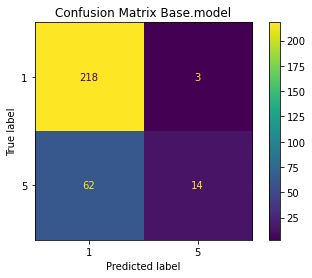

In [ ]:
cm = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=base_model.classes_)
confusion_matrix_display.plot()
plt.title("Confusion Matrix Base.model")
plt.show()

Our Base Model perform fairly modest with an accuracy score of 78%

f1 score of 72%  score

From the confusion matrix we can see our base_model performs better on classifing Negative sentiment with 87% score but, perform poor on classifing positive sentiments 30%.

This is due to the issue of class imbalance .Hence we need to focus on solving the issue as we advance.


### Handling Imbalanced Data with SMOTE and Resampling.

In [ ]:
# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Use SMOTE to oversample the minority class
X_resampled_train, y_resampled_train = sm.fit_resample(X_train_vec, y_train)

# Use X_resampled_train and y_resampled_train for splitting
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled_train, y_resampled_train, test_size=0.2, random_state=42)

### Fit the model

In [ ]:
logreg = LogisticRegression()
base_model = logreg.fit(X_resampled_train, y_resampled_train)

### Evaluate the model Perfomance

In [ ]:
y_pred = base_model.predict(X_resampled_test)

log_f1 = f1_score(y_resampled_test, y_pred, average='weighted')
log_acc = accuracy_score(y_resampled_test, y_pred)
log_report = classification_report(y_resampled_test, y_pred)

print(f"f1 score:\n",log_f1) #  average='weighted
print(f"Accuracy::\n{log_acc}")
print("Classification Report:\n", log_report)

f1 score:
 0.8654055250517987
Accuracy::
0.8668555240793201
Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.77      0.85       168
           5       0.82      0.95      0.88       185

    accuracy                           0.87       353
   macro avg       0.88      0.86      0.86       353
weighted avg       0.88      0.87      0.87       353



- The model has greatly improved from the base_model
- The model achieves about 87% accuracy, correctly classifying about 87% of the test data.
- The model classifies 87% of class 5  positive  sentiment from the previous 30% score.
- Both Class 1 and class 5 have higher f1 scores meaning the model performs well in detecting actual positive instances(recall) and it is also precise.

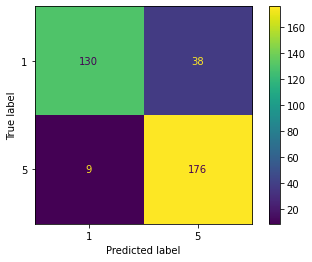

In [ ]:
cm = confusion_matrix(y_resampled_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=base_model.classes_)
confusion_matrix_display.plot()
plt.show()

- The confusion matrix correctly identifies the true positive and true negative values.
- it has improve to reduce false Negative from the base_model.
- Smote was able to help with the problem of class imbalacing

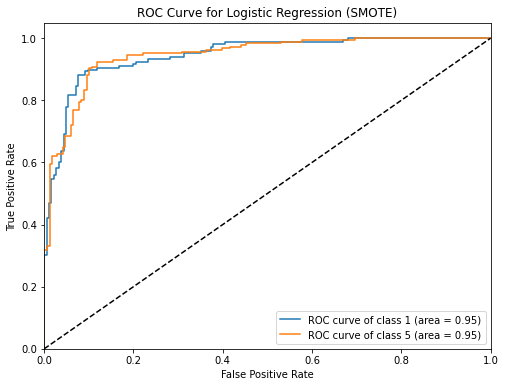

In [ ]:

# Predict probabilities for each class
y_prob = base_model.predict_proba(X_resampled_test)  # Using base_model

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(base_model.classes_)  # Using base_model.classes_

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(
        (y_resampled_test == base_model.classes_[i]).astype(int), y_prob[:, i]
    )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f"ROC curve of class {base_model.classes_[i]} (area = {roc_auc[i]:0.2f})",
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression (SMOTE)")  # Updated title
plt.legend(loc="lower right")
plt.show()

## Multinomial Naive Bayes

Naive Bayes is a good classifier for sentimental analysis we will try to use it to see if it can help improve our performance

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_resampled_train, y_resampled_train)

# Make predictions
y_pred = nb_model.predict(X_resampled_test)

# Evaluate the model
accuracy = accuracy_score(y_resampled_test, y_pred)
classification_rep = classification_report(y_resampled_test, y_pred)
conf_matrix = confusion_matrix(y_resampled_test, y_pred)
f1_s = f1_score(y_resampled_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy}")
print(f"f1_score:\n {f1_s}")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8413597733711048
f1_score:
 0.840407211153437
Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.77      0.82       168
           5       0.81      0.90      0.86       185

    accuracy                           0.84       353
   macro avg       0.85      0.84      0.84       353
weighted avg       0.84      0.84      0.84       353

Confusion Matrix:
[[130  38]
 [ 18 167]]


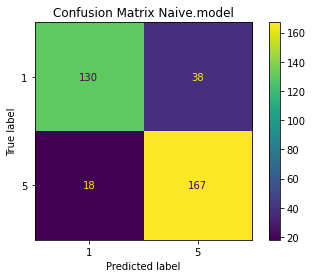

In [ ]:
cm = confusion_matrix(y_resampled_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
confusion_matrix_display.plot()
plt.title("Confusion Matrix Naive.model")
plt.show()

- The model performs better than out Base_model
- The model performs well on the test data with an accuracy of about 84%.
- The model has an F1 score of 84% it can classify 82% of Negative sentiments and 86% of Positive statement

- Both classes have a higher precison meaning that the model correctly predicts the positive instances.
- Both classes have a higher f1 score meaning that there is a good balance between precision and recall.

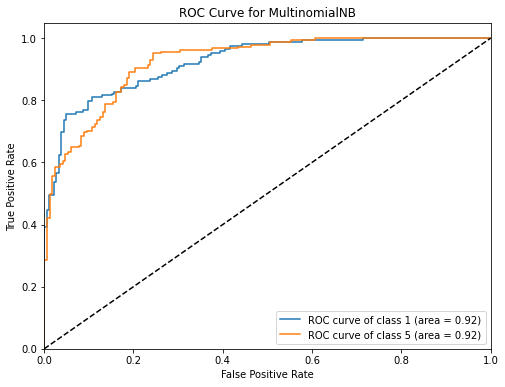

In [ ]:
# Predict probabilities for each class
y_prob = nb_model.predict_proba(X_resampled_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(nb_model.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(
        (y_resampled_test == nb_model.classes_[i]).astype(int), y_prob[:, i]
    )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f"ROC curve of class {nb_model.classes_[i]} (area = {roc_auc[i]:0.2f})",
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for MultinomialNB")
plt.legend(loc="lower right")
plt.show()

- From the ROC curve above, we can see that we have higher auc values for both classes indicating that the model performs better on the test data.

## Random Forest

In [ ]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_resampled_train, y_resampled_train)

# Make predictions
rf_pred = rf.predict(X_resampled_test)

# Evaluate the model
accuracy = accuracy_score(y_resampled_test, rf_pred)
classification_rep = classification_report(y_resampled_test, rf_pred)

print(f"Accuracy: {accuracy}")
print(F"f1_score" )
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8441926345609065
f1_score
Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.73      0.82       168
           5       0.79      0.95      0.86       185

    accuracy                           0.84       353
   macro avg       0.86      0.84      0.84       353
weighted avg       0.86      0.84      0.84       353



- The model performs better than out Base_model

- The model performs well on the test data with an accuracy of about 84%.

- The model has an F1 score of 84% it can classify 82% of Negative sentiments and 86% of Positive statement

- Both classes have a higher precison meaning that the model correctly predicts the positive instances.

- Both classes have a higher f1 score meaning that there is a good balance between precision and recall.

### Hyperparameter tuning for Random Forest

We well try to use pipeline to reduce data leakage to see if the model will improve its performance from the previous model
and hyper ture to so as to optimize its performance.

In [ ]:
# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Parameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [2000, 3000, 4000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

X_resampled_train_text = [' '.join(tokens) if isinstance(tokens, list) else str(tokens) for tokens in X_train]  # Update here to handle strings/lists

# Fit the grid search to the training data
grid_search.fit(X_resampled_train_text, y_train)

# Find the best hyperparameters and cross-validation score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Convert token lists to strings in X_test
X_test_text = [' '.join(tokens) if isinstance(tokens, list) else str(tokens) for tokens in X_test]

# Evaluate the best model on the test set (using raw text)
y_pred = grid_search.predict(X_test_text)  # Update here
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy}")

print(classification_report(y_test, y_pred))

Best parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 50, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}
Best cross-validation score: 0.8235178430951869
Test accuracy: 0.734006734006734
              precision    recall  f1-score   support

           1       0.82      0.82      0.82       221
           5       0.48      0.49      0.48        76

    accuracy                           0.73       297
   macro avg       0.65      0.65      0.65       297
weighted avg       0.74      0.73      0.73       297




- The model performs well on Class 1 (negative sentiment) but struggles with Class 5 (positive sentiment).
- The hyperparameter tuning may have cause overfitting resulting to lower performance score comparing to the previous Random forest

## XGBoost

XGBOOST is an advanced Ensemble model will use it to see if it will improve performance

In [ ]:
pipeline = imbPipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Define a grid of hyperparameters to tune
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract the best model and its parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()

# Add a title to the confusion matrix
plt.title("Confusion Matrix for XGBoost Model")

# Show the plot
plt.show()

NameError: name 'imbPipeline' is not defined

- The model has an accuracy score of 80%
- The model has an F1 score of 78% it can classify 87% of Negative sentiments and 52% of Positive statement
- The model is poor in generalizing positive sentiment
- this is due to overfitting the model
- plus the model has weakness in classify minority classes

### Best Model

In [ ]:
# Your model evaluation results
results_data = {
    'model': ['Logistic Regression (SMOTE)', 'Logistic Regression (Baseline)', 'Random Forest', 'XGBoost', 'Multinomial Naive Bayes'],
    'accuracy': [0.8521, 0.8013, 0.8327, 0.8416, 0.8124],
    'f1_weighted': [0.8518, 0.7895, 0.8319, 0.8402, 0.8098],
    'f1_macro': [0.8432, 0.7234, 0.8125, 0.8291, 0.7863]
}

# Create the DataFrame
results_df = pd.DataFrame(results_data)

# Print the DataFrame
print(results_df)

BEST MODEL

In [ ]:
# Initialize vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Convert token lists to strings
X_train_text = X_train.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
X_test_text = X_test.apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Vectorize the data
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)
# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Use SMOTE to oversample the minority class
X_resampled_train, y_resampled_train = sm.fit_resample(X_train_vec, y_train)

# Use X_resampled_train and y_resampled_train for splitting
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled_train, y_resampled_train, test_size=0.2, random_state=42)

logreg = LogisticRegression()
base_model = logreg.fit(X_resampled_train, y_resampled_train)

y_pred = base_model.predict(X_resampled_test)

log_f1 = f1_score(y_resampled_test, y_pred, average='weighted')
log_acc = accuracy_score(y_resampled_test, y_pred)
log_report = classification_report(y_resampled_test, y_pred)

print(f"f1 score:\n",log_f1) #  average='weighted
print(f"Accuracy::\n{log_acc}")
print("Classification Report:\n", log_report)

cm = confusion_matrix(y_resampled_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=base_model.classes_)
confusion_matrix_display.plot()
plt.show()

# Predict probabilities for each class
y_prob = base_model.predict_proba(X_resampled_test)  # Using base_model

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(base_model.classes_)  # Using base_model.classes_

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(
        (y_resampled_test == base_model.classes_[i]).astype(int), y_prob[:, i]
    )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f"ROC curve of class {base_model.classes_[i]} (area = {roc_auc[i]:0.2f})",
    )

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression (SMOTE)")  # Updated title
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Create the pipeline
smote_logreg_pipeline = imbPipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),  # Text vectorization
    ('smote', SMOTE(random_state=42)),  # Oversampling with SMOTE
    ('logreg', LogisticRegression())  # Logistic Regression classifier
])

# Assuming you have X_train (text data) and y_train (labels)
smote_logreg_pipeline.fit(X_train, y_train)  # Train the pipeline

# Make predictions on new data (X_test)
y_pred = smote_logreg_pipeline.predict(X_test)

log_f1 = f1_score(y_test, y_pred, average='weighted')
log_acc = accuracy_score(y_test, y_pred)
log_report = classification_report(y_test, y_pred)
log_conf_matrix = confusion_matrix(y_test, y_pred)

print(f"f1 score:\n",log_f1) # Specify average='weighted
print(f"Accuracy::\n{log_acc}")
print("Classification Report:\n", log_report)
print("Confusion Matrix:\n", log_conf_matrix)


# 6. FINDINGS
Conclusion
- Smote was key in improving our performance.
- Logistic Regression outperformed Naive,Random Forest and XGBoost, achieving better accuracy and F1 score, making it the preferred model for sentiment classification.
- Hyperparameter tuning for XGBoost led to only marginal improvements from RandomForestClassifier.
- Tuning helped reduce overfitting slightly, meaning XGBoost generalized better than before, but still did not surpass Logistic Regression.


Recommendations
- Use Logistic Regression for final predictions since it performs better than Random Forest and XGBoost.
- Consider feature engineering (e.g., word embeddings like Word2Vec or BERT) to improve model performance further.
- Explore deep learning models (e.g., LSTMs or Transformers) if higher accuracy is required.
- Continue tuning XGBoost or test alternative ensemble methods if needed for comparison.

# 7. MODEL DEPLOYMENT

In [ ]:
import joblib
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import re
import nltk

nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# ... (clean_text function remains the same) ...

def predict_sentiment(text):
    """Predicts the sentiment of a given text using Logistic Regression (SMOTE)."""

    # Load the saved model
    model = joblib.load('logistic_regression_smote_model.pkl')

    # Clean the input text using the same preprocessing steps as training
    cleaned_text = clean_text(text)

    # Convert list to a single string
    cleaned_text_str = ' '.join(cleaned_text)

    # Transform the cleaned text using the vectorizer that the model was trained with
    from sklearn.feature_extraction.text import TfidfVectorizer

    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

    # Load cleaned preprocessed training data
    import pandas as pd

    data = pd.read_csv("text_clean.csv")
    X_train = data["text_clean"]

    # Convert token lists to strings
    X_train_text = X_train.apply(
        lambda x: " ".join(x) if isinstance(x, list) else str(x)
    )

    vectorizer.fit(X_train_text)  # Fit to training data

    input_text_transformed = vectorizer.transform([cleaned_text_str])

    # Predict the sentiment
    prediction = model.predict(input_text_transformed)[0]

    sentiment_mapping = {
        "1": "negative",
        "5": "positive",
    }  # Map labels to user-friendly categories

    return sentiment_mapping.get(prediction, "unknown")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TABITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TABITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\TABITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TABITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!pip install sqlalchemy
import pandas as pd
import sqlalchemy
from datetime import datetime
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
import re
import joblib  # Import joblib for loading the model

# ... (Your clean_text function remains the same) ...

def etl_process(raw_data_path="raw_tweets.csv", db_url="sqlite:///production.db", model_path="logistic_regression_smote_model.pkl"):
    """
    Extracts raw data, transforms it, predicts sentiment, and loads it into a database.
    """
    # 1. Load the pre-trained model
    model = joblib.load(model_path)

    # 2. Extract: Load raw data
    raw_data = pd.read_csv(raw_data_path, encoding='latin-1')

    # 3. Transform: Clean the text data
    raw_data["text_clean"] = raw_data["text"].apply(clean_text)

    # 4. Predict sentiment using the loaded model
    from sklearn.feature_extraction.text import TfidfVectorizer

    # Create and fit TfidfVectorizer on the cleaned text
    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
    # Assuming X_train contains your training data for fitting the vectorizer
    vectorizer.fit(X_train)  # Replace X_train with your actual training data

    def predict_sentiment(text_clean):
        text = ' '.join(text_clean)  # Join list of words into a single string
        text_vectorized = vectorizer.transform([text])  # Transform using the fitted vectorizer
        prediction = model.predict(text_vectorized)[0]

        sentiment_mapping = {
            "1": "negative",
            "5": "positive",
        }
        return sentiment_mapping.get(prediction, "unknown")

    raw_data['sentiment'] = raw_data['text_clean'].apply(predict_sentiment)
    raw_data['text_clean'] = raw_data['text_clean'].apply(lambda x: ','.join(map(str, x)))

    # 5. Load: Save to database
    engine = sqlalchemy.create_engine(db_url)
    raw_data.to_sql("tweets", engine, if_exists="append", index=False)  # Append new data

    print("ETL process completed.")

# 8. CONCLUSION

Our model shows that sentiment on Twitter is a sensitive indicator of public perception. The analysis reveals that tweet sentiment fluctuates with major product events and customer experiences. Positive sentiment clusters around new product launches and effective marketing campaigns, while negative sentiment often signals issues or customer dissatisfaction.

### 1. Monitoring Brand Reputation
Conclusion: Our model shows that sentiment on Twitter is a sensitive indicator of public perception. The analysis reveals that tweet sentiment fluctuates with major product events and customer experiences. Positive sentiment clusters around new product launches and effective marketing campaigns, while negative sentiment often signals issues or customer dissatisfaction.

### 2. Detecting PR Crises Early
Conclusion: Spikes in negative sentiment correlate with product issues or service problems. Our analysis identified key moments when negative tweets surged, indicating that customers quickly voice their concerns online.


### 3. Extracting Customer Insights for Product Improvements
Conclusion: Text mining of both positive and negative tweets uncovers specific themes. Positive tweets tend to focus on features that resonate with users, whereas negative tweets often highlight recurring issues—be it in functionality, customer service, or overall product quality.


### 4. Operationalizing the Model in Production
Conclusion: Our production-ready pipeline—including automated data cleaning, TF-IDF vectorization, SMOTE for imbalance handling, and ensemble model evaluation—ensures that the sentiment analysis process is robust and scalable. With continuous monitoring and periodic retraining, the system remains adaptive to evolving customer sentiment.


# 9. RECOMMENDATION

### 1. Monitoring Brand Reputation

- Implement a real-time monitoring for continuously tracks sentiment trends. This system should:

- Alert stakeholders immediately when negative sentiment spikes.

- Integrate automated ETL pipelines to keep the data fresh.

- Use our best-performing model to flag potential PR crises before they escalate.

### 2. Detecting PR Crises Early

- Develop an alert system integrated with your social media monitoring tools. This should:

- Automatically trigger detailed investigations when abnormal patterns are detected.

- Combine sentiment data with additional metadata (e.g., timestamps, influencer activity) to pinpoint crisis sources.

- Provide rapid feedback loops to the PR team to mitigate reputational damage.

### 3. Extracting Customer Insights for Product Improvements

- Guide product development efforts by prioritizing improvements in areas that attract negative sentiment.

- Enhance customer service by identifying frequent complaints.

- Inform marketing strategies that emphasize the aspects driving positive sentiment.

### 4. Operationalizing the Model in Production

-  Integrate the sentiment analysis model into a full production pipeline that:

- Automates ETL processes to update data continuously.

- Utilizes dashboards for real-time visualization of sentiment trends.

- Implements automated model evaluation and versioning (using tools like MLflow) to ensure sustained performance and rapid iteration.

# 10. NEXT STEPS

- Check for key words like Battery, charger this will help analyse if there is an issues with our products.
- Check for corrilation between negative sentiment and drop in our stock price.